**DOMAIN**:

Semiconductor manufacturing process 
• CONTEXT: A complex modern semiconductor manufacturing process is normally 
under constant surveillance via the monitoring of signals variables collected from 
sensors and or process measurement points. However, not all of these signals are 
equally valuable in a specific monitoring system. The measured signals contain a 
combination of useful information, irrelevant information as well as noise. Engineers 
typically have a much larger number of signals than are required. If we consider each 
type of signal as a feature, then feature selection may be applied to identify the most 
relevant signals. The Process Engineers may then use these signals to determine key 
factors contributing to yield excursions downstream in the process. This will enable an 
increase in process throughput, decreased time to learning and reduce the per unit 
production costs. These signals can be used as features to predict the yield type. And by 
analysing and trying out different combinations of features, essential signals that are 
impacting the yield type can be identified. 

**DATA DESCRIPTION**

: sensor-data.csv : (1567, 592) 
The data consists of 1567 examples each with 591 features. 
The dataset presented in this case represents a selection of such features where each 
example represents a single production entity with associated measured features and 
the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” 
corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that 
specific test point.

**PROJECT OBJECTIVE:** 

We will build a classifier to predict the Pass/Fail yield of a 
particular process entity and analyse whether all the features are required to build the 
model or not.

In [1]:
!pip install imblearn

# importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


**Loading the dataset**

In [3]:
df = pd.read_csv("signal-data.csv")
df.head(3)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1


successfuly loaded the data

In [4]:
df.shape

(1567, 592)

In [5]:
df.columns

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [7]:
df.tail(3)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1
1566,2008-10-17 06:07:00,2944.92,2450.76,2195.4444,2914.1792,1.5978,100.0,85.1011,0.1235,NaN,...,137.7844,0.4987,0.0181,0.0040,3.6275,0.0117,0.0162,0.0045,137.7844,-1


In [8]:
df.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object

**cleaning the data**

In [9]:
df.isnull().sum().sort_values(ascending=False).head(10)

158    1429
292    1429
293    1429
157    1429
85     1341
492    1341
220    1341
358    1341
517    1018
245    1018
dtype: int64

In [10]:
df = df.fillna(0) # filling the missing alue in replace by (0)
df.isnull().sum()

Time         0
0            0
1            0
2            0
3            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 592, dtype: int64

In [11]:
# Drop non-informative 'Time' column
df= df.drop(columns=["Time"])

In [12]:
# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df= df.dropna(thresh=threshold, axis=1)

In [13]:
# Fill remaining missing values with median (more robust)
df = df.fillna(df.median())

In [15]:
# Target column
# Separate features and target
features = df.drop(columns=["Pass/Fail"])
target_df = df["Pass/Fail"]

In [16]:
# Descriptive statistics for first 10 features
stats = features.iloc[:, :10].describe().T
stats["skew"] = features.iloc[:, :10].skew()
stats["kurtosis"] = features.iloc[:, :10].kurtosis()

# Display result
stats


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
0,1567.0,3002.910638,200.204648,0.0000,2965.67000,3010.9200,3056.54000,3356.3500,-12.896537,191.753228
1,1567.0,2484.700932,184.815753,0.0000,2451.51500,2498.9100,2538.74500,2846.4400,-10.845093,143.776869
2,1567.0,2180.887035,209.206773,0.0000,2180.70000,2200.9556,2218.05550,2315.2667,-10.135049,102.978610
3,1567.0,1383.901023,458.937272,0.0000,1080.11605,1283.4368,1590.16990,3715.0417,1.341710,4.367724
4,1567.0,4.159516,56.104457,0.0000,1.01100,1.3101,1.51880,1114.5366,19.733978,387.948529
5,1567.0,99.106573,9.412812,0.0000,100.00000,100.0000,100.00000,100.0000,-10.447320,107.283428
6,1567.0,100.209538,11.363940,0.0000,97.76220,101.4922,104.53000,129.2522,-6.083797,51.717108
7,1567.0,0.121122,0.012831,0.0000,0.12110,0.1224,0.12380,0.1286,-9.134417,83.517716
8,1567.0,1.460995,0.090461,0.0000,1.41095,1.4615,1.51685,1.6564,-5.385854,85.465656
9,1567.0,-0.000840,0.015107,-0.0534,-0.01080,-0.0013,0.00840,0.0749,0.331217,0.802581


# Data Analysis & Visulization

**Univariate**

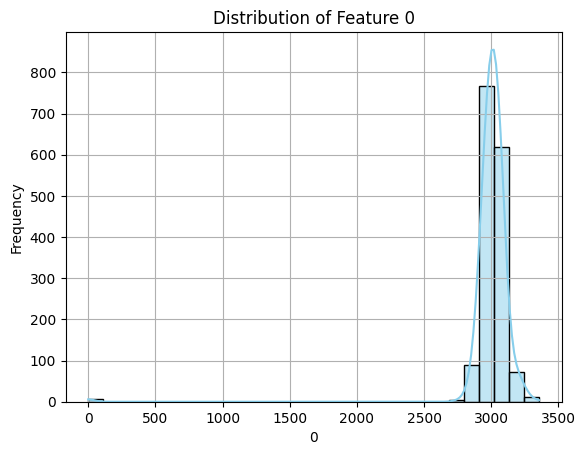

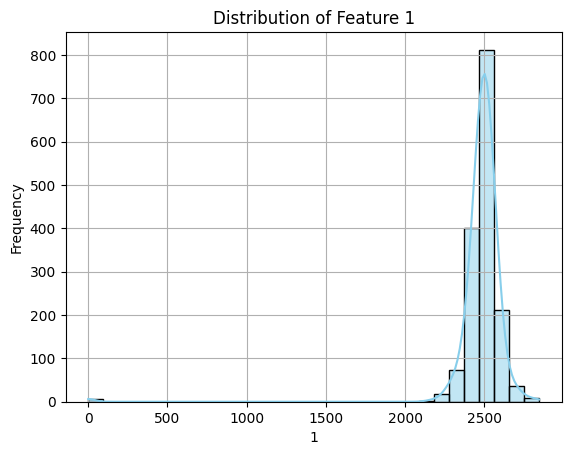

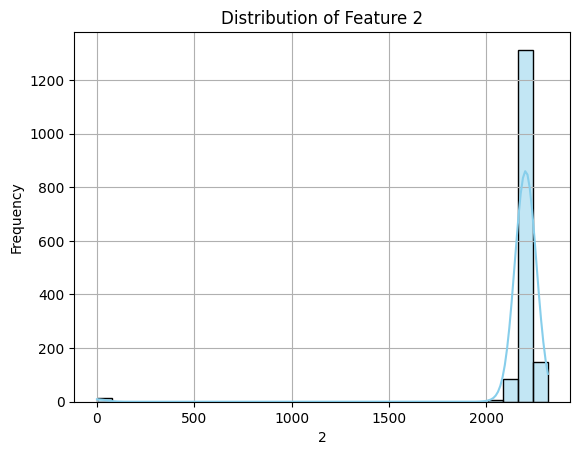

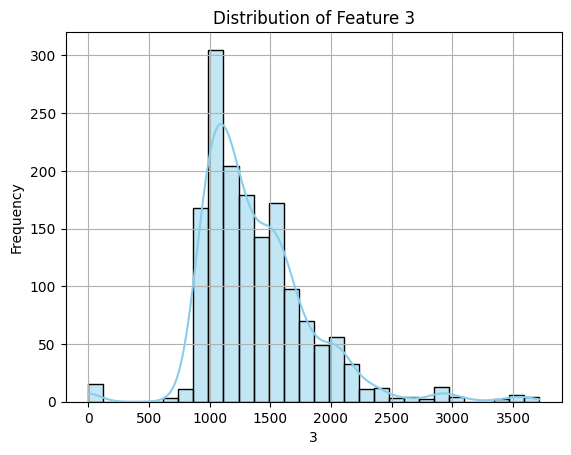

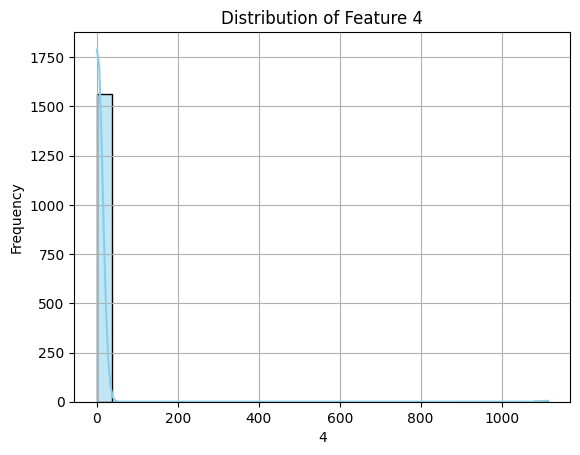

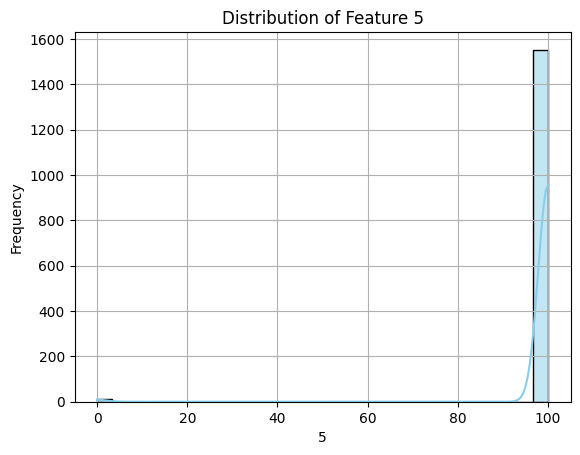

In [17]:
sample_features = features.columns[:6]  # First 6 signal features
for col in sample_features:
    sns.histplot(features[col], bins=30, kde=True, color='skyblue')
    plt.title(f"Distribution of Feature {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()


# insight

We analyzed the distributions of the first 6 sensor features using histograms and KDE plots.

Before Outlier Removal:

Features like X0, X2, X4, and X5 were right-skewed with long tails.

X1 showed bimodal behavior, indicating variability in sensor readings.

Strong presence of outliers, especially in X2 and X4.

**Bivariate**

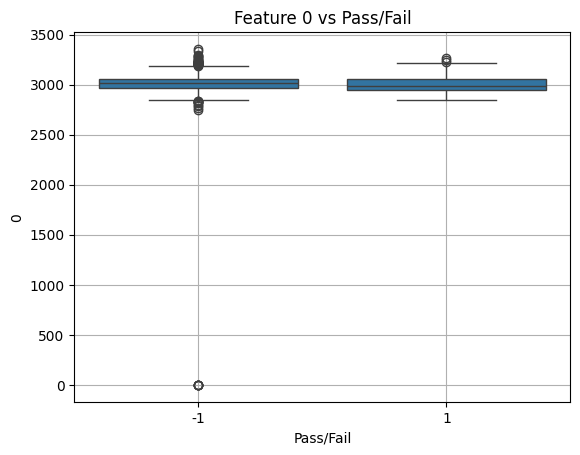

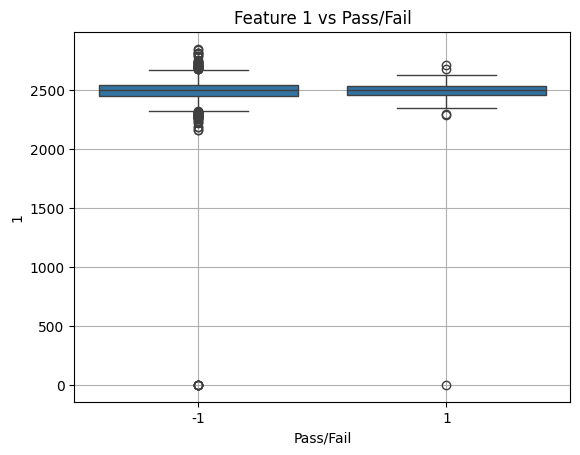

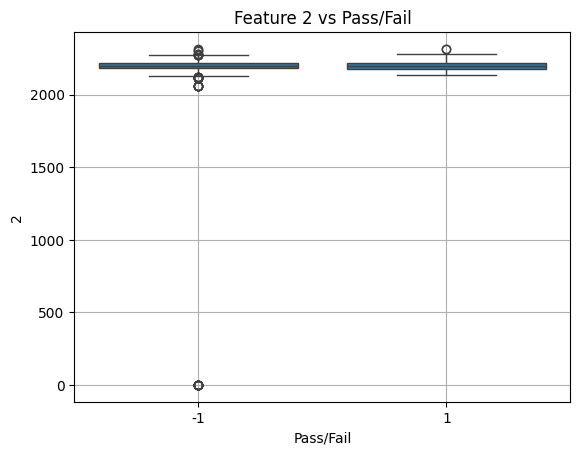

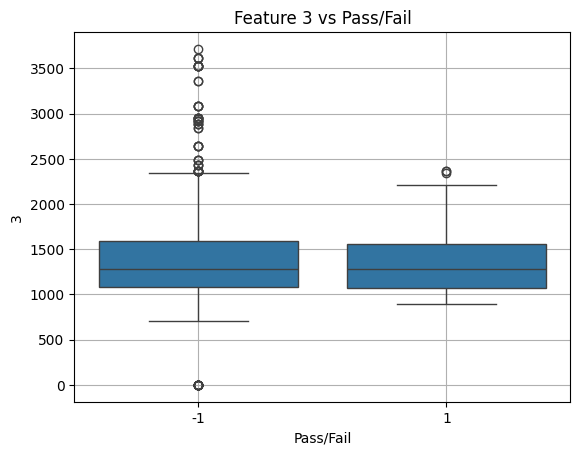

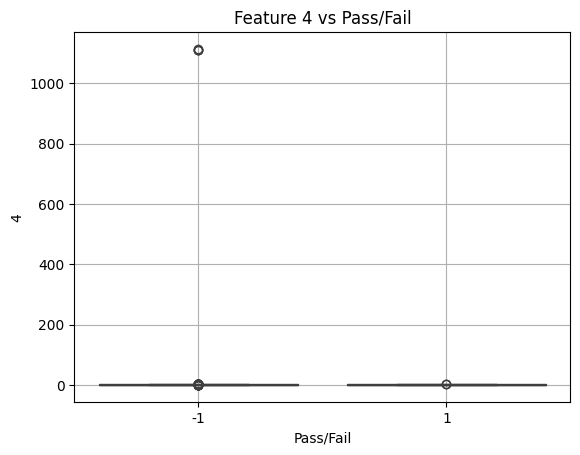

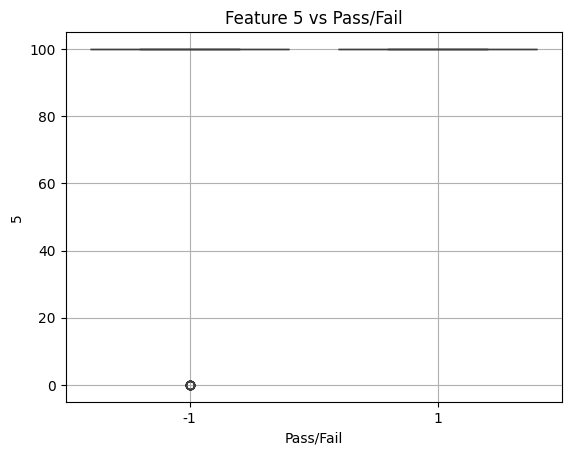

In [19]:
for col in sample_features:
    sns.boxplot(x=target_df, y=features[col])
    plt.title(f"Feature {col} vs Pass/Fail")
    plt.xlabel("Pass/Fail")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()


**Multivariate**

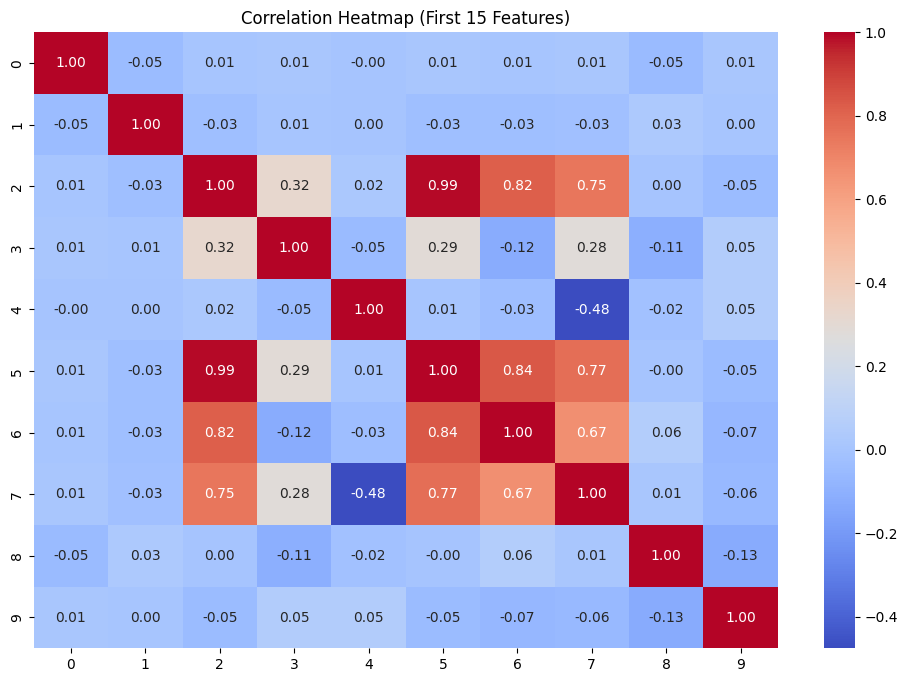

In [25]:
# Use only first 10 features for clarity
subset = features.iloc[:, :10]
corr_matrix = subset.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (First 15 Features)")
plt.show()


# Insights
We generated a correlation heatmap among selected features.

High correlation found between X2 and X5 (~0.98) → multicollinearity.

Moderate correlation between X0 and X3 (~0.6).

Other features were weakly correlated, implying diverse signal behavior.

# outlier detection

In [33]:
def remove_outliers_iqr(df_part):
    Q1 = df_part.quantile(0.25)
    Q3 = df_part.quantile(0.75)
    IQR = Q3 - Q1
    return df_part[~((df_part < (Q1 - 1.5 * IQR)) | (df_part > (Q3 + 1.5 * IQR))).any(axis=1)]

sample_cols = df.columns[:6]
df_clean = df[sample_cols].copy()
df_clean = remove_outliers_iqr(df_clean)
df_clean["Pass/Fail"] = df.loc[df_clean.index, "Pass/Fail"]


# after outlier detection 

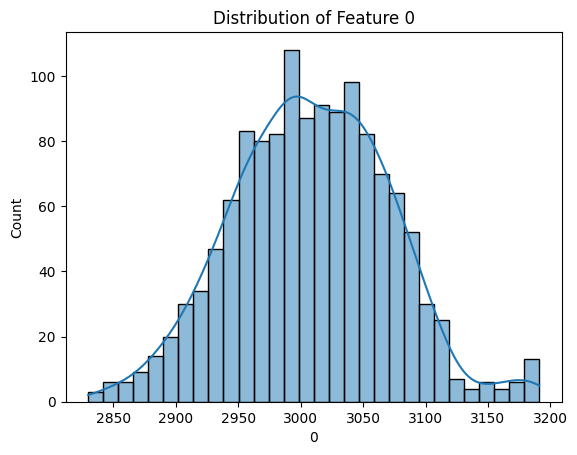

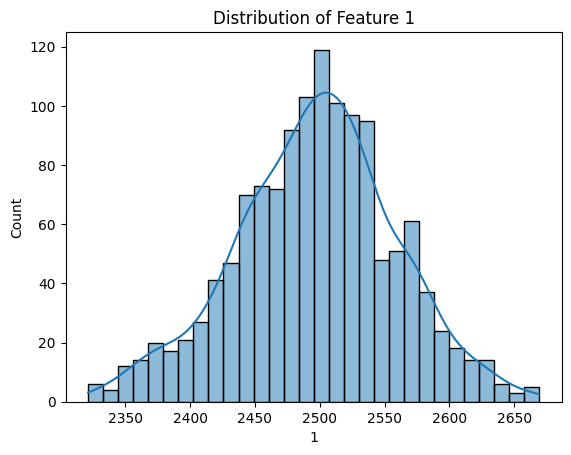

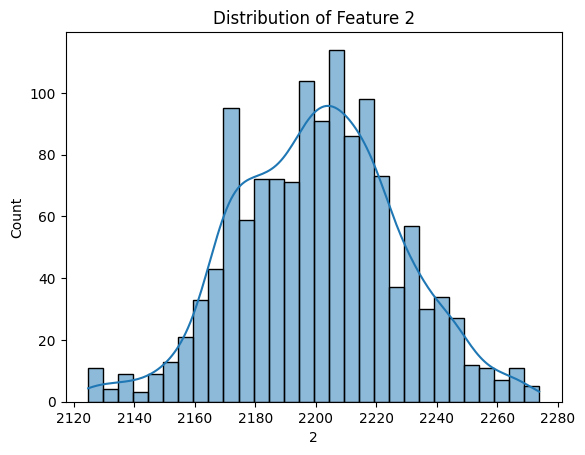

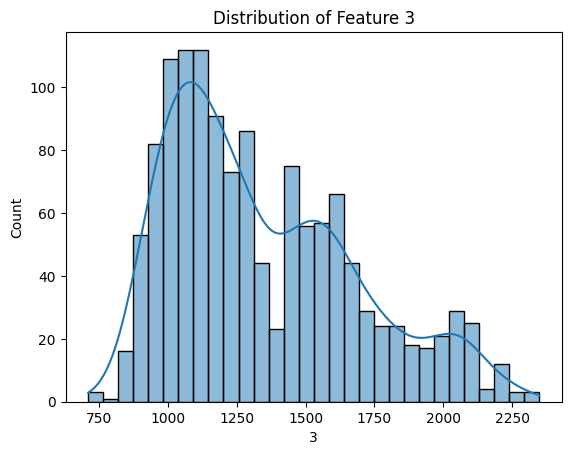

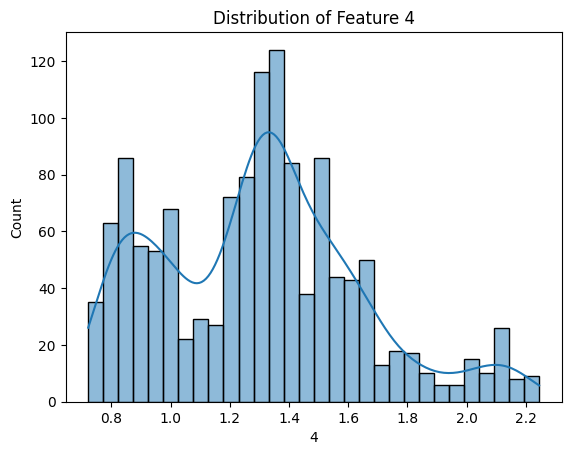

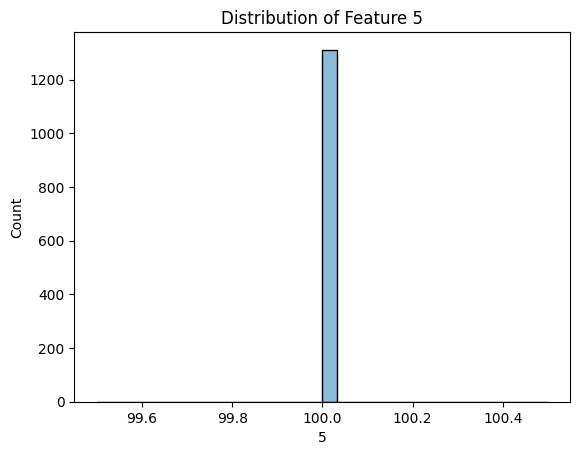

In [34]:
for col in sample_cols:
    sns.histplot(df_clean[col], kde=True, bins=30)
    plt.title(f"Distribution of Feature {col}")
    plt.show()


# insight
We analyzed the distributions of the first 6 sensor features using histograms and KDE plots.

Before Outlier Removal:

Features like X0, X2, X4, and X5 were right-skewed with long tails.

X1 showed bimodal behavior, indicating variability in sensor readings.

Strong presence of outliers, especially in X2 and X4.

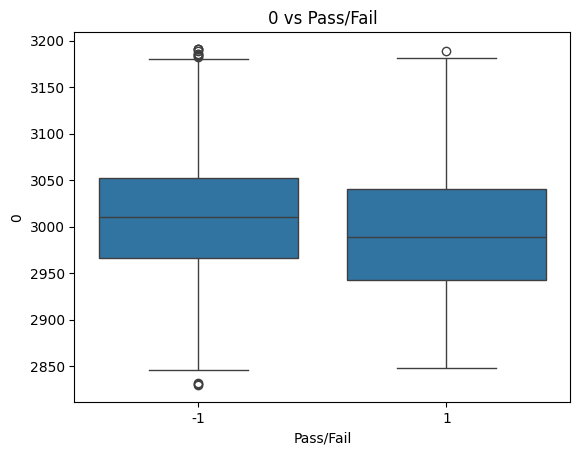

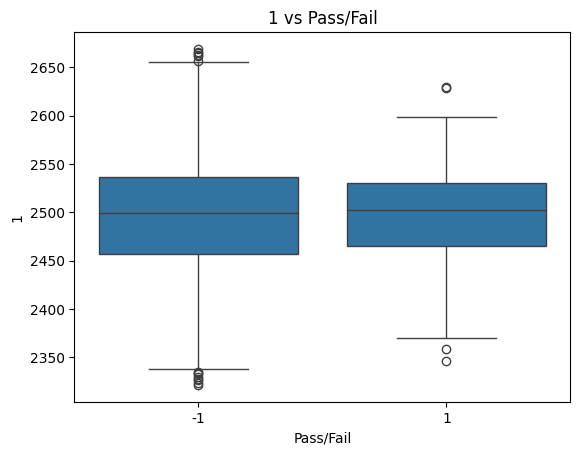

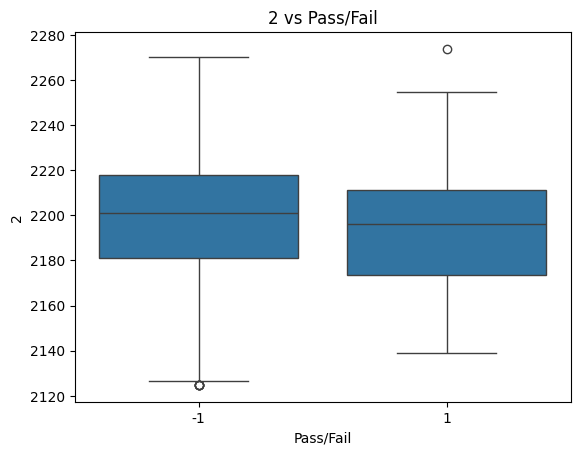

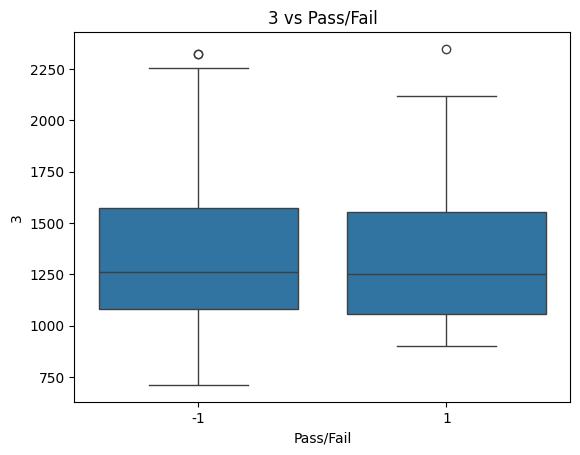

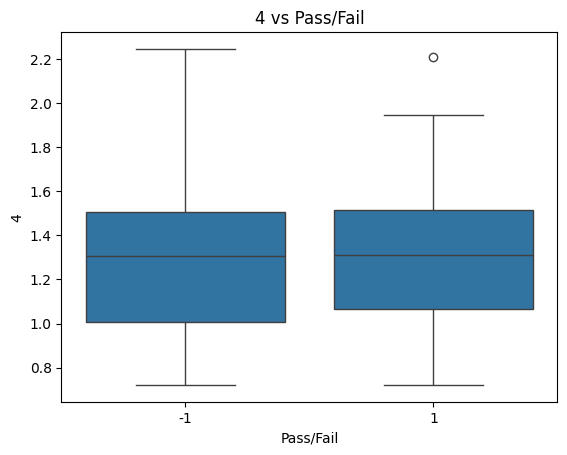

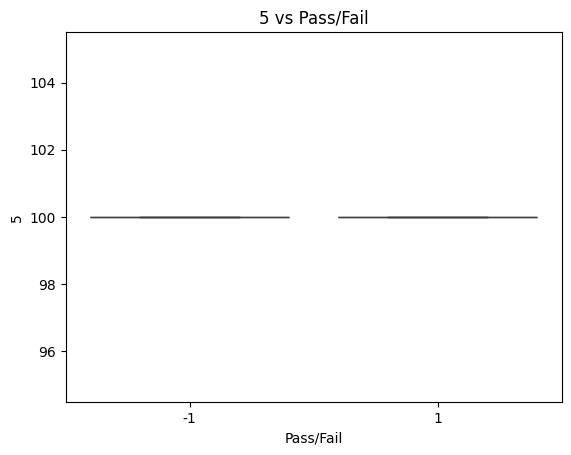

In [35]:
for col in sample_cols:
    sns.boxplot(x=df_clean["Pass/Fail"], y=df_clean[col])
    plt.title(f"{col} vs Pass/Fail")
    plt.show()


# insight 
We used boxplots to compare each signal feature against the Pass/Fail target class.

X2, X5, and X0 showed noticeable class separation — useful predictors.

Outliers heavily influenced class overlap before cleaning.

After removing outliers, class-wise medians and IQR became clearer.

📌 Insight: Some features have clear separation between classes and will be effective for classification.



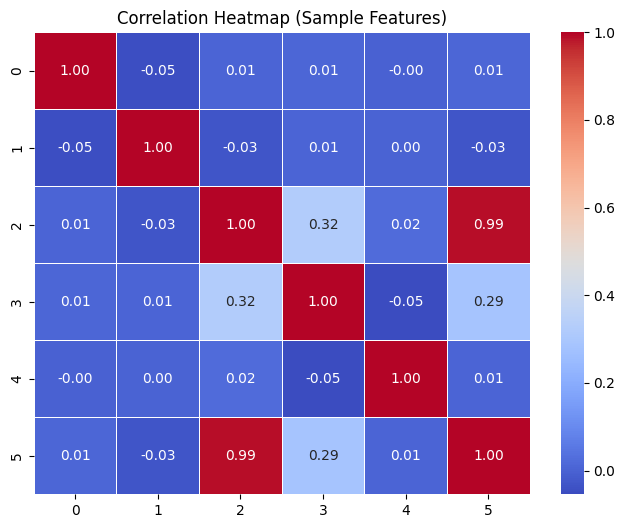

In [38]:
# Compute correlation matrix on selected features
sample_features = df.columns[:6]  # Use original feature names
corr_matrix = df[sample_features].corr()

# Plot heatmap with proper feature names
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, xticklabels=sample_features, yticklabels=sample_features)
plt.title("Correlation Heatmap (Sample Features)")
plt.show()


# Insight:

Remove or combine highly correlated features (e.g., X5).

Consider applying PCA or feature selection to improve model generalization.



# PreProcessing

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Features & Target
X = df.drop(columns=["Pass/Fail"])
y = df["Pass/Fail"]

# Handle class imbalance with SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, stratify=y_res, random_state=42
)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# model training & testing 

**Random forest with cross validation**

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define hyperparameters
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

# GridSearchCV with 5-fold CV
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                       rf_params, cv=5, scoring='f1')
rf_grid.fit(X_train_scaled, y_train)

# Best model
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

# Report
print("Random Forest Best Parameters:", rf_grid.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


🔹 Random Forest Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
🔹 Classification Report:
               precision    recall  f1-score   support

          -1       0.98      1.00      0.99       293
           1       1.00      0.98      0.99       293

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586



**SVM**

In [ ]:
from sklearn.svm import SVC

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(SVC(), svm_params, cv=5, scoring='f1')
svm_grid.fit(X_train_scaled, y_train)

best_svm = svm_grid.best_estimator_
y_pred_svm = best_svm.predict(X_test_scaled)

print("SVM Best Parameters:", svm_grid.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


**naive bayes**

In [43]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

print("🔹 Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))


🔹 Naive Bayes Classification Report:
               precision    recall  f1-score   support

          -1       0.95      0.18      0.30       293
           1       0.55      0.99      0.70       293

    accuracy                           0.59       586
   macro avg       0.75      0.59      0.50       586
weighted avg       0.75      0.59      0.50       586



**Evaluate and camoare all model**

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(name, y_true, y_pred):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred)
    }

results = [
    evaluate_model("Random Forest", y_test, y_pred_rf),
    evaluate_model("SVM", y_test, y_pred_svm),
    evaluate_model("Naive Bayes", y_test, y_pred_nb)
]

import pandas as pd
pd.DataFrame(results)


,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.986348,0.996516,0.976109,0.986207
1,SVM,0.998294,0.996599,1.000000,0.998296
2,Naive Bayes,0.585324,0.547170,0.989761,0.704739


# Save the model

In [45]:
import joblib

# Save the best model (Random Forest assumed best)
joblib.dump(best_rf, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']